In [1]:
#standard library import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## reading the training data
train = pd.read_csv("C:/Users/HP/Documents/data science competitions/Mushroom dataset DSG-IITR/mushroom_train.csv")

In [3]:
## reading the test data
test = pd.read_csv("C:/Users/HP/Documents/data science competitions/Mushroom dataset DSG-IITR/mushroom_test.csv")

In [4]:
## first look at the data
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,w,w,p,w,36,o,p,n,s,m


In [5]:
## overview of data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 25 columns):
class                       5686 non-null object
cap-shape                   5686 non-null object
cap-surface                 5686 non-null object
cap-color                   5686 non-null object
bruises                     5686 non-null object
odor                        5686 non-null object
gill-attachment             5686 non-null object
gill-spacing                5686 non-null object
gill-size                   5686 non-null object
gill-color                  5686 non-null object
stalk-shape                 5686 non-null object
stalk-root                  5686 non-null object
radius                      5686 non-null int64
stalk-surface-above-ring    5686 non-null object
stalk-surface-below-ring    5686 non-null object
stalk-color-above-ring      5686 non-null object
stalk-color-below-ring      5686 non-null object
veil-type                   5686 non-null object
veil-color  

In [6]:
train.describe()

,radius,weight
count,5686.000000,5686.000000
mean,202.627682,33.012487
std,350.213032,13.379082
min,1.000000,0.000000
25%,38.000000,23.000000
50%,129.000000,27.000000
75%,259.000000,40.000000
max,3500.000000,102.000000


#### Seems like apart from radius and weight, all other variables are categorical in nature. Let's get started with univariate analysis of categorical variables.

In [7]:
### check on duplicate rows
train[train.duplicated]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat


In [8]:
#making a list of all the qualitative variables. I will use it later to do univariate analysis in one go.
column_object = train.columns 
columns= []
for column in column_object:
    columns.append(column)
columns.pop(12)
columns.pop(18)


'weight'

#### For analysis of categorical variables, I will use value counts and countplot.

d    2227
g    1500
p     798
l     568
u     256
m     198
w     139
Name: habitat, dtype: int64
d    2227
g    1500
p     798
l     568
u     256
m     198
w     139
Name: habitat, dtype: int64
d    2227
g    1500
p     798
l     568
u     256
m     198
w     139
Name: habitat, dtype: int64
d    2227
g    1500
p     798
l     568
u     256
m     198
w     139
Name: habitat, dtype: int64
d    2227
g    1500
p     798
l     568
u     256
m     198
w     139
Name: habitat, dtype: int64
d    2227
g    1500
p     798
l     568
u     256
m     198
w     139
Name: habitat, dtype: int64
d    2227
g    1500
p     798
l     568
u     256
m     198
w     139
Name: habitat, dtype: int64
d    2227
g    1500
p     798
l     568
u     256
m     198
w     139
Name: habitat, dtype: int64
d    2227
g    1500
p     798
l     568
u     256
m     198
w     139
Name: habitat, dtype: int64
d    2227
g    1500
p     798
l     568
u     256
m     198
w     139
Name: habitat, dtype: int64
d    2227
g    1500


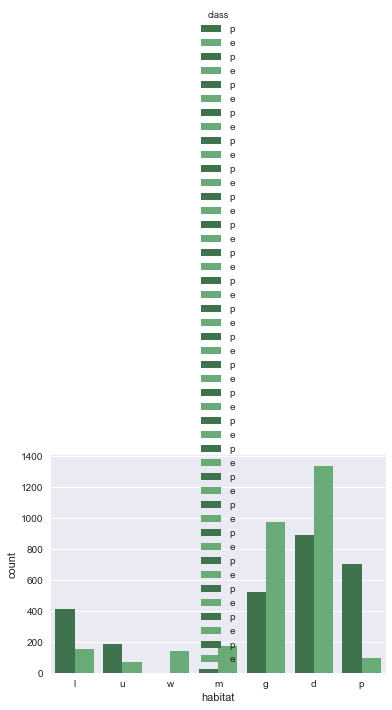

In [9]:
for variable in columns:
        print(train[column].value_counts())
       



#### I will use the value_counts table printed above while making inferences from countplot.


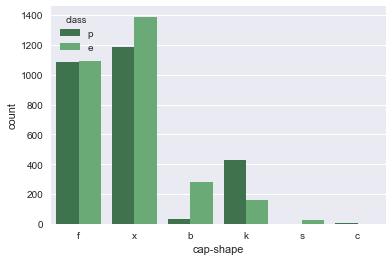

In [29]:
sns.countplot(x='cap-shape',data=train,palette='Greens_d',hue='class')

     

Cap-shape 'f' ans 'x' cover most of the data set. While there is equal proportion of poisonous and edible in 'f', edible dominates in case of 'x' cap-shape

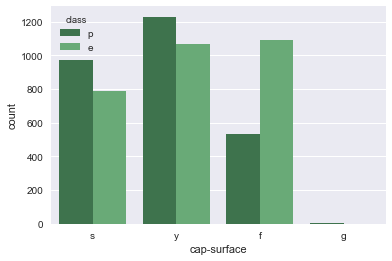

In [30]:
sns.countplot(x='cap-surface',data=train,palette='Greens_d',hue='class')

A good mix of three types of cap-surface. Except 'f', Poisonous class dominates. 

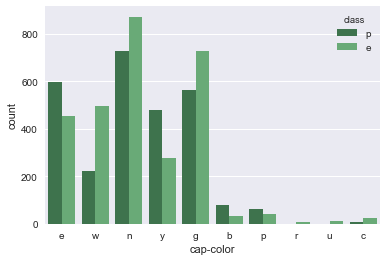

In [31]:
sns.countplot(x='cap-color',data=train,palette='Greens_d',hue='class')

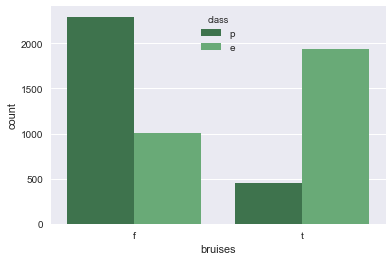

In [32]:
sns.countplot(x='bruises',data=train,palette='Greens_d',hue='class')

There is a clear cut indication that bruises of type 'f' are most probably poisonous while 't' is dominantly edible

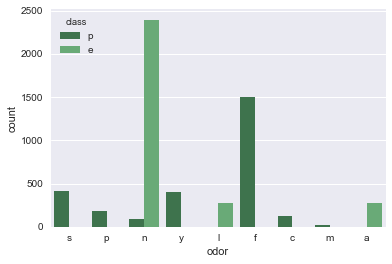

In [33]:
sns.countplot(x='odor',data=train,palette='Greens_d',hue='class')

In case of odor type 'x', the mushroom is almost always edible. Reverse is the case for type  'f'.

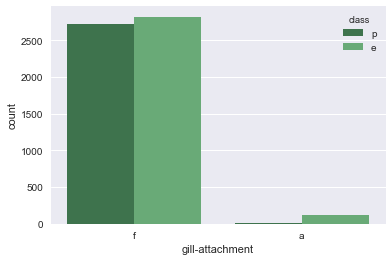

In [34]:
sns.countplot(x='gill-attachment',data=train,palette='Greens_d',hue='class')

The population is largely dominated by 'gill-attachment' type 'f' and have almost equal proportion of poisonous and edible mushrooms.

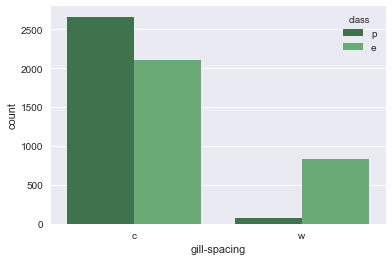

In [35]:
sns.countplot(x='gill-spacing',data=train,palette='Greens_d',hue='class')

Although less in number, gill-spacing type 'w' gives strong indication of edible mushroom.

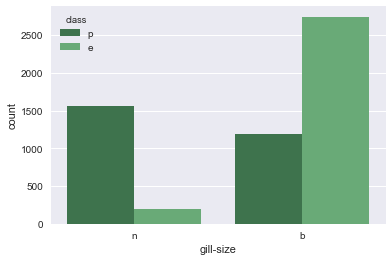

In [36]:
sns.countplot(x='gill-size',data=train,palette='Greens_d',hue='class')

There is a strong indication that gil-size 'n' is almost always poisonous while gill-size 'b' is always edible.

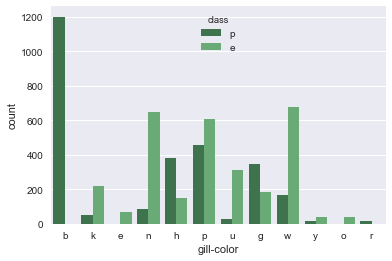

In [38]:
sns.countplot(x='gill-color',data=train,palette='Greens_d',hue='class')

Gill-color of type 'b' covers most of the data points and is always poisonous.

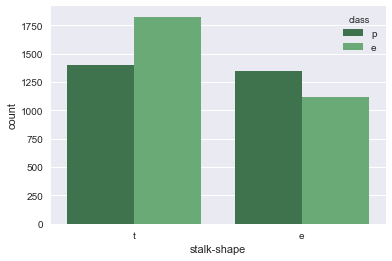

In [39]:
sns.countplot(x='stalk-shape',data=train,palette='Greens_d',hue='class')

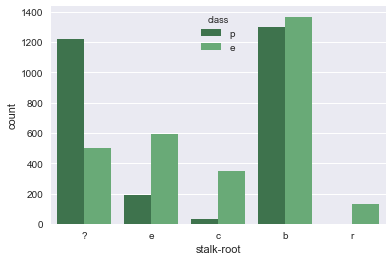

In [40]:
sns.countplot(x='stalk-root',data=train,palette='Greens_d',hue='class')

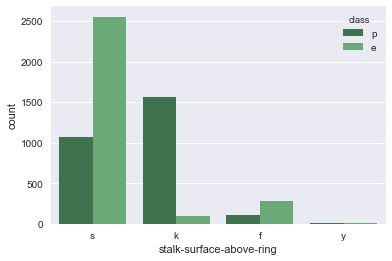

In [41]:
sns.countplot(x='stalk-surface-above-ring',data=train,palette='Greens_d',hue='class')

This variabke of type 's' is dominantly edible while type 'k' is dominantly poisonous.

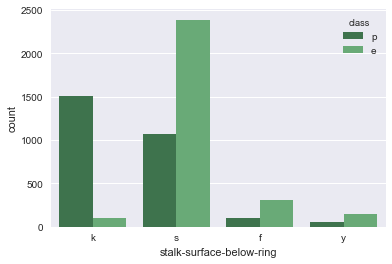

In [42]:
sns.countplot(x='stalk-surface-below-ring',data=train,palette='Greens_d',hue='class')

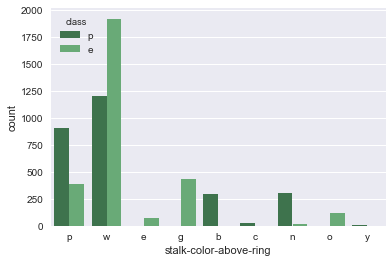

In [43]:
sns.countplot(x='stalk-color-above-ring',data=train,palette='Greens_d',hue='class')

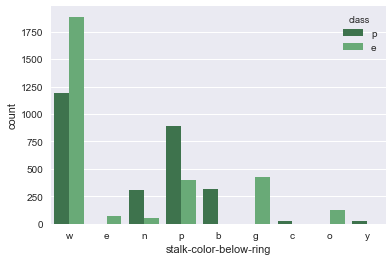

In [44]:
sns.countplot(x='stalk-color-below-ring',data=train,palette='Greens_d',hue='class')

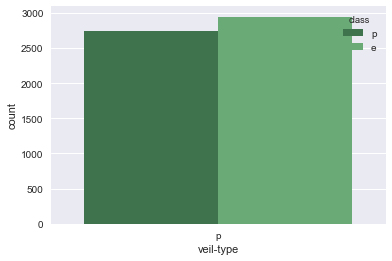

In [45]:
sns.countplot(x='veil-type',data=train,palette='Greens_d',hue='class')

Only one level of veil-type variable and hence useless variables. Should drop in later stages.

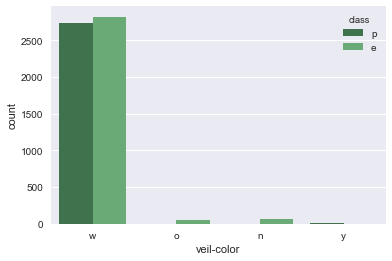

In [46]:
sns.countplot(x='veil-color',data=train,palette='Greens_d',hue='class')

Mostly covered by single type of veil-color.

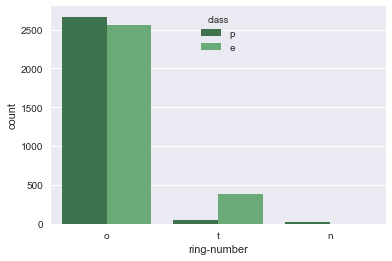

In [47]:
sns.countplot(x='ring-number',data=train,palette='Greens_d',hue='class')

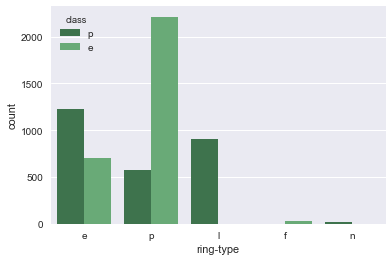

In [48]:
sns.countplot(x='ring-type',data=train,palette='Greens_d',hue='class')

Ring-type 'p' is a strong evidence of edible mushroom.

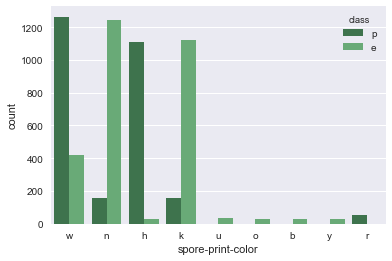

In [49]:
sns.countplot(x='spore-print-color',data=train,palette='Greens_d',hue='class')

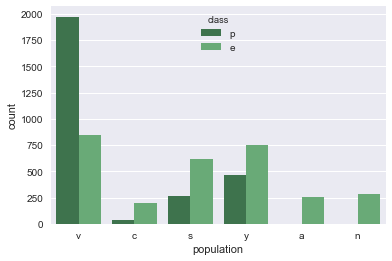

In [50]:
sns.countplot(x='population',data=train,palette='Greens_d',hue='class')

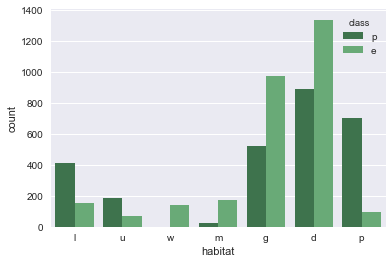

In [51]:
sns.countplot(x='habitat',data=train,palette='Greens_d',hue='class')

#### Next, let's analyze continuous variables i.e. radius and weight

In [10]:
train.describe()

,radius,weight
count,5686.000000,5686.000000
mean,202.627682,33.012487
std,350.213032,13.379082
min,1.000000,0.000000
25%,38.000000,23.000000
50%,129.000000,27.000000
75%,259.000000,40.000000
max,3500.000000,102.000000


#### I will limit the histogram upto a suitable range so that the division of intervals is more informative on the x-axis.

In [11]:
train.loc[train.radius>3000,:].shape

(40, 25)

(array([ 972.,  480.,  324.,  316.,  327.,  293.,  269.,  264.,  263.,
         230.,  206.,  188.,  142.,  134.,  145.,  111.,  111.,   92.,
         102.,   82.,   79.,   59.,   57.,   45.,   47.,   39.,   31.,
          32.,   33.,   29.,   19.,   16.,   15.,   13.,   11.,   11.,
           6.,    6.,    4.,    5.,    4.,    4.,    3.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([    0.,    20.,    40.,    60.,    80.,   100.,   120.,   140.,
          160.,   180.,   200.,   220.,   240.,   260.,   280.,   300.,
          320.,   340.,   360.,   380.,   400.,   420.,   440.,   460.,
          480.,   500.,   520.,   540.,   560.,   580.,   600.,   620.,
          640.,   660.,   680.,   700.,   720.,   740.,   760.,   780.,
          800.,   820.,   840.,   860.,   880.,   900.,   920.,   940.,
          960.,   980.,  1000.]),
 <a list of 50 Patch objects>)

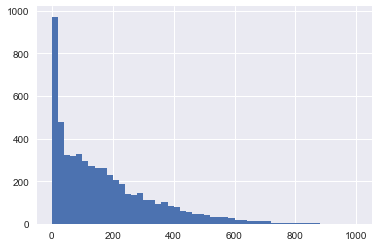

In [12]:
plt.hist(train.radius,bins=50,range=[0,1000])

The distribution is right skewed.

{'boxes': [<matplotlib.lines.Line2D at 0x1bc4f804cc0>],
 'caps': [<matplotlib.lines.Line2D at 0x1bc4f7accf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1bc4f762a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1bc4f762240>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1bc4f8040b8>,
  <matplotlib.lines.Line2D at 0x1bc4f7ac860>]}

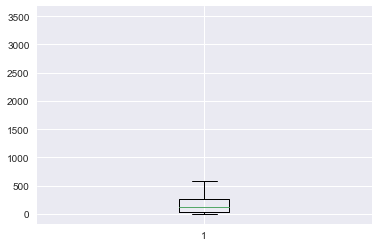

In [13]:
#### To get a clear idea of percentage distibution of data, I will plot a boxplot.
plt.boxplot(train.radius)

####  Clearly, there are some species whose radius is extremely large and hence making it difficult to make sense out of box plot. Let's find the median and compare it with mean. Also, let's have a look at the target values corresponding to these rows.

In [14]:
train.radius.median()

129.0

If we compare it with mean i.e. 202, there is a huge difference between median and mean which signifies that most of the data is below 200 but there are some species of mushroom whose radius is very large which pull the mean up. Let's see what happens to mean if we remove the extremely large value. I am considering 1000 as extremely large.

In [15]:
train[train.radius<1000].radius.mean()

169.8347269169187

The difference between this mean and overall mean is large which proves our point. Further let's have a look at the target variables correspondig to extreme values.

In [16]:
train[train.radius>1000]['class'].value_counts()

p    35
e    30
Name: class, dtype: int64

In [17]:
train[train.radius<2].shape

(67, 25)

Large values of radius is not signifying any clear cut impact on target variable. Next, I will repeat the same procedure on other continuous variable weight.


(array([   81.,  1965.,   757.,   255.,   264.,   318.,   210.,   325.,
          198.,   178.,   258.,   123.,   103.,    79.,    83.,   107.,
           46.,    58.,    32.,    24.,    34.,    19.,    25.,    14.,
           19.]),
 array([ 20. ,  22.4,  24.8,  27.2,  29.6,  32. ,  34.4,  36.8,  39.2,
         41.6,  44. ,  46.4,  48.8,  51.2,  53.6,  56. ,  58.4,  60.8,
         63.2,  65.6,  68. ,  70.4,  72.8,  75.2,  77.6,  80. ]),
 <a list of 25 Patch objects>)

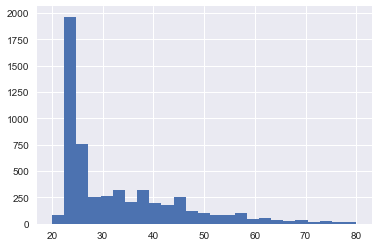

In [18]:
plt.hist(train.weight,bins = 25,range=[20,80])

{'boxes': [<matplotlib.lines.Line2D at 0x1bc4f7335f8>],
 'caps': [<matplotlib.lines.Line2D at 0x1bc4f725a20>,
 'fliers': [<matplotlib.lines.Line2D at 0x1bc4f74f9e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1bc4f723b00>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1bc4f733f98>,
  <matplotlib.lines.Line2D at 0x1bc4f725828>]}

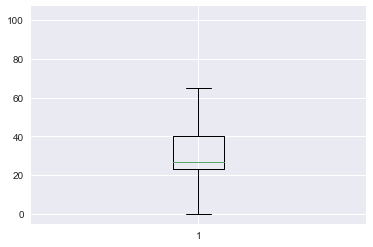

In [19]:
plt.boxplot(train.weight)

Ideally, larger radius should correspond to larger weight. Let's verify it with correlation.

In [20]:
train.weight.corr(train.radius,method='pearson')

-0.012034755012738145

Seems like we got a wrong hypothesis. 